In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn')

In [23]:
raw = pd.read_csv('data/independent-medical-review-imr-determinations-trends.csv', delimiter=',', encoding = 'cp1252')

In [24]:
df = raw.copy()

# Hypothesis one - Diagnosis

In [25]:
'''

Question: Is the probability of Genetic Diseases being overturned more than the probability of Infectious Diseases?

pGD = probability of Genetic Diseases being overturned
pID = probability of Infectious Diseases being overturned

null Hypothesis(n0): pGD >= pID
alternate Hypothesis(nA): pGD < pID 

'''

'\n\nQuestion: Is the probability of Genetic Diseases being overturned more than the probability of Infectious Diseases?\n\npGD = probability of Genetic Diseases being overturned\npID = probability of Infectious Diseases being overturned\n\nnull Hypothesis(n0): pGD >= pID\nalternate Hypothesis(nA): pGD < pID \n\n'

In [26]:
# Importing and sorting the required columns

dfd_ = df[['ReferenceID', 'DiagnosisCategory', 'Determination']]

dfd_['Gen'] = dfd_['DiagnosisCategory'].str.find('Genetic')
dfd_gen = dfd_[(dfd_['Gen']==0)]
dfd_gen.drop(columns = ['Gen', 'DiagnosisCategory'], inplace = True)
dfd_gen.rename(columns = {'ReferenceID':'Genetic Diseases'}, inplace = True)
dfd_gen['Out'] = dfd_['Determination'].str.find('Overturned')
dfd_gen['Out'] = dfd_gen['Out'] + 1
dfd_gen.drop(columns = ['Determination'], inplace = True)
dfd_gen.rename(columns = {'Out':'Determination', 'Genetic Diseases': 'Count'}, inplace = True)
dfd_Gen = dfd_gen.groupby(['Determination']).count()     ###     0 = Upheld          1 = Overturned



dfd_['Inf'] = dfd_['DiagnosisCategory'].str.find('Infectious')
dfd_inf = dfd_[(dfd_['Inf']==0)]
dfd_inf.drop(columns = ['Gen', 'Inf', 'DiagnosisCategory'], inplace = True)
dfd_inf.rename(columns = {'ReferenceID':'Infectious Diseases'}, inplace = True)
dfd_inf['Out'] = dfd_['Determination'].str.find('Overturned')
dfd_inf['Out'] = dfd_inf['Out'] + 1
dfd_inf.drop(columns = ['Determination'], inplace = True)
dfd_inf.rename(columns = {'Out':'Determination', 'Infectious Diseases': 'Count'}, inplace = True)
dfd_Inf = dfd_inf.groupby(['Determination']).count()     ###     0 = Upheld          1 = Overturned


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/anaconda3/lib/python3.7/site-pac

(-1, 1)

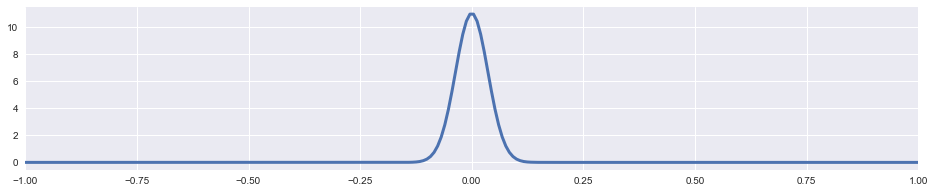

In [27]:
# Z-test hypothesis
shared_sample_freq = (101.0 + 1194.0) / 1828
shared_sample_variance = 1828 * (shared_sample_freq * (1 - shared_sample_freq)) / 286315

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=250)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.set_xlim(-1, 1)

In [28]:
gen_sample_freq = 101.0 / 173
inf_sample_freq = 1194.0 / 1655
difference_in_sample_proportions = inf_sample_freq - gen_sample_freq
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions))

Difference in sample proportions: 0.14


In [29]:
p_value_s11 = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print("p-value for overturned frequency comparison: {:2.2f}".format(p_value_s11))

p-value for overturned frequency comparison: 0.00


Text(0.5, 1.0, 'p-value Region')

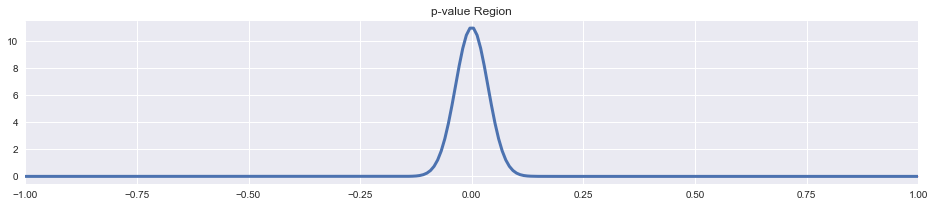

In [30]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=250)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.fill_between(x, difference_in_proportions.pdf(x), where=(x >= difference_in_sample_proportions),
                color="red", alpha=0.5)
ax.set_xlim(-1, 1)
ax.set_title("p-value Region")


### REJECT THE NULL HYPOTHESIS   ###

In [31]:
# Welch T-test hypothesis

stats.ttest_ind(dfd_gen['Determination'],dfd_inf['Determination'], equal_var=False)

Ttest_indResult(statistic=-3.5139541066765587, pvalue=0.0005444228952773852)

In [32]:
# U-test Hypothesis

res = stats.mannwhitneyu(dfd_inf.Determination, dfd_gen.Determination, alternative="greater")
print(res)
print("p-value for Genetic Diseases overturned < Infectious Diseases overturned: {:2.3f}".format(res.pvalue))

MannwhitneyuResult(statistic=162861.0, pvalue=7.566336333763438e-05)
p-value for Genetic Diseases overturned < Infectious Diseases overturned: 0.000


# Hypothesis two - Age [ 0/10 to 51/64]

In [33]:
'''

Question: Is the probability of '0 to 10' age group being overturned more than the probability of '51 to 64'?

p_lw = probability of '0 to 10' age group being overturned
p_hi = probability of '51 to 64' age group being overturned

null Hypothesis(n0): p_lw <= p_hi
alternate Hypothesis(nA): p_lw > p_hi

'''

"\n\nQuestion: Is the probability of '0 to 10' age group being overturned more than the probability of '51 to 64'?\n\np_lw = probability of '0 to 10' age group being overturned\np_hi = probability of '51 to 64' age group being overturned\n\nnull Hypothesis(n0): p_lw <= p_hi\nalternate Hypothesis(nA): p_lw > p_hi\n\n"

In [34]:
# Importing and sorting the required columns

dfa_ = df[['ReferenceID', 'AgeRange', 'Determination']]

dfa_['0 to 10'] = dfa_['AgeRange'].str.find('0 to 10')
dfa_lw = dfa_[(dfa_['0 to 10']==0)]
dfa_lw.drop(columns = ['0 to 10', 'AgeRange'], inplace = True)
dfa_lw.rename(columns = {'ReferenceID':'0 to 10'}, inplace = True)
dfa_lw['Out'] = dfa_['Determination'].str.find('Overturned')
dfa_lw['Out'] = dfa_lw['Out'] + 1
dfa_lw.drop(columns = ['Determination'], inplace = True)
dfa_lw.rename(columns = {'Out':'Determination', '0 to 10': 'Count'}, inplace = True)
#dfa_LW = dfa_lw.groupby(['Determination']).count()     ###     0 = Upheld          1 = Overturned


dfa_['51 to 64'] = dfa_['AgeRange'].str.find('51 to 64')
dfa_hi = dfa_[(dfa_['51 to 64']==0)]
dfa_hi.drop(columns = ['0 to 10', '51 to 64', 'AgeRange'], inplace = True)
dfa_hi.rename(columns = {'ReferenceID':'51 to 64'}, inplace = True)
dfa_hi['Out'] = dfa_['Determination'].str.find('Overturned')
dfa_hi['Out'] = dfa_hi['Out'] + 1
dfa_hi.drop(columns = ['Determination'], inplace = True)
dfa_hi.rename(columns = {'Out':'Determination', '51 to 64': 'Count'}, inplace = True)
#dfa_HI = dfa_hi.groupby(['Determination']).count()     ###     0 = Upheld          1 = Overturned


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

(-1, 1)

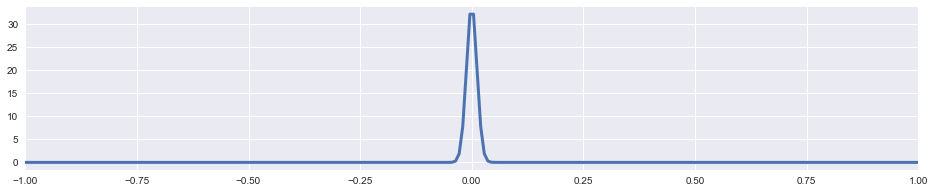

In [35]:
# Z-test hypothesis
shared_sample_freq = (1475.0 + 4738.0) / 12664
shared_sample_variance = 12664 * (shared_sample_freq * (1 - shared_sample_freq)) / 23136300

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=250)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.set_xlim(-1, 1)

In [36]:
lw_sample_freq = 1475.0 / 2214
hi_sample_freq = 4738.0 / 10450
difference_in_sample_proportions = lw_sample_freq - hi_sample_freq
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions))

Difference in sample proportions: 0.21


In [37]:
p_value_s21 = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print("p-value for overturned frequency comparison: {:2.2f}".format(p_value_s21))

p-value for overturned frequency comparison: 0.00


Text(0.5, 1.0, 'p-value Region')

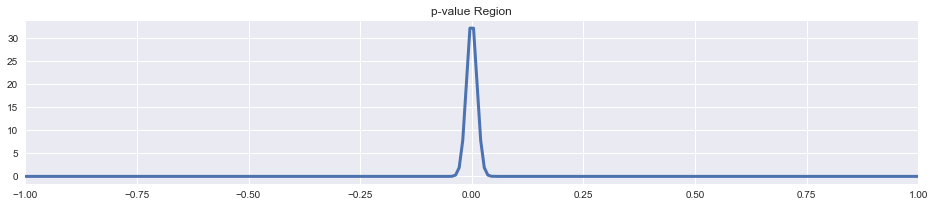

In [38]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=250)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.fill_between(x, difference_in_proportions.pdf(x), where=(x >= difference_in_sample_proportions),
                color="red", alpha=0.5)
ax.set_xlim(-1, 1)
ax.set_title("p-value Region")


### REJECT THE NULL HYPOTHESIS   ###

In [39]:
# Welch T-test hypothesis

def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

test_statistic = welch_test_statistic(dfa_hi.Determination, dfa_lw.Determination)
# print("Welch Test Statistic: {:2.2f}".format(test_statistic))


def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

df_w2 = welch_satterhwaithe_df(dfa_hi.Determination, dfa_lw.Determination)
# print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df_w2))

In [40]:
p_value_s22 = students.cdf(test_statistic) + (1 - students.cdf(-test_statistic))
print("p-value for overturned frequency comparison: {:2.4f}".format(p_value_s22))

test_statistic = welch_test_statistic(dfa_lw.Determination, dfa_hi.Determination)

p_value_s23 = 1 - students.cdf(test_statistic)
print("p-value for 0 to 10 age group overturn frequency greater than 51 to 64 age group: {:2.4f}".format(p_value_s23))

NameError: name 'students' is not defined

In [41]:
# U-test Hypothesis

res = stats.mannwhitneyu(dfa_lw.Determination, dfa_hi.Determination, alternative="greater")
print(res)
print("p-value for 0 to 10 age group overturned < 51 to 64 age group overturned: {:2.3f}".format(res.pvalue))

MannwhitneyuResult(statistic=14030059.0, pvalue=2.811876409934623e-74)
p-value for 0 to 10 age group overturned < 51 to 64 age group overturned: 0.000


# Hypothesis three - General 

In [92]:
'''

Question: Is the probability of a decision being overturned more than the probability of it being upheld?

pU = probability of a decision being upheld
pO = probability of a decision being overturned

null Hypothesis(n0): pO <= 0.5
alternate Hypothesis(nA): pO >0.5

'''

'\n\nQuestion: Is the probability of a decision being overturned more than the probability of it being upheld?\n\npU = probability of a decision being upheld\npO = probability of a decision being overturned\n\nnull Hypothesis(n0): pO <= 0.5\nalternate Hypothesis(nA): pO >0.5\n\n'

In [93]:
# Importing and sorting the required columns

dfg_ = df[['ReferenceID', 'Determination']]

dfg_['Out'] = dfg_['Determination'].str.find('Overturned')
dfg_['Out'] = dfg_['Out'] + 1
dfg_.drop(columns = ['Determination'], inplace = True)
dfg_.rename(columns = {'Out':'Determination', 'ReferenceID': 'Count'}, inplace = True)
dfg = dfg_.groupby(['Determination']).count()     ###     0 = Upheld          1 = Overturned

dfg

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Count
Determination,
0,15125
1,12923


Text(0.5, 1.0, '# of Decisions Overturned under Null Hypothesis')

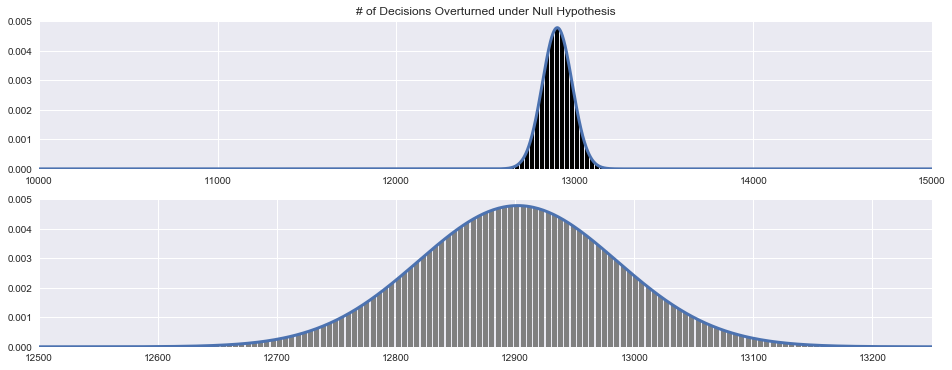

In [94]:
# One Sample Approximation

binomial = stats.binom(n=28048, p=0.46)
binomial_mean = 0.46 * 28048
binomial_var = 28048 * 0.46 * 0.54
normal_approx = stats.norm(binomial_mean, np.sqrt(binomial_var))
x = np.linspace(0, 28048, num=20000)

fig, axs = plt.subplots(2, figsize=(16, 6))
bar_sizes = [binomial.pmf(i) for i in range(28049)]
bars = axs[0].bar(range(28049), bar_sizes, color="black", align="center")
axs[0].plot(x, normal_approx.pdf(x), linewidth=3)
axs[0].set_xlim(10000, 15000)

bars = axs[1].bar(range(28049), bar_sizes, color="grey", align="center")
axs[1].plot(x, normal_approx.pdf(x), linewidth=3)
axs[1].set_xlim(12500, 13250)

axs[0].set_title("# of Decisions Overturned under Null Hypothesis")

In [95]:
p_value_s31 = 1 - normal_approx.cdf(12922.5)
print("p-value for overturned probability: {:2.2f}".format(p_value_s31))

p-value for overturned probability: 0.40


Text(0.5, 1.0, 'p-value Reigon')

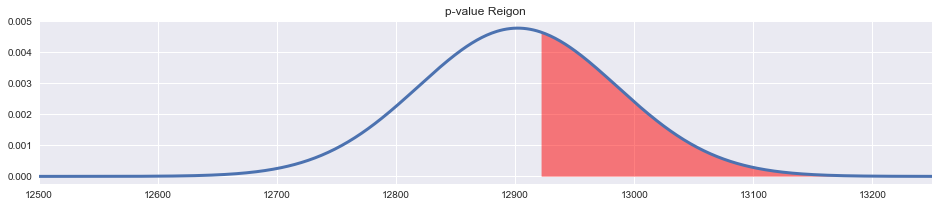

In [96]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.plot(x, normal_approx.pdf(x), linewidth=3)
ax.set_xlim(12500, 13250)
ax.fill_between(x, normal_approx.pdf(x), 
                where=(x >= 12922), color="red", alpha=0.5)
ax.set_title("p-value Reigon")

# Distribution for the samples

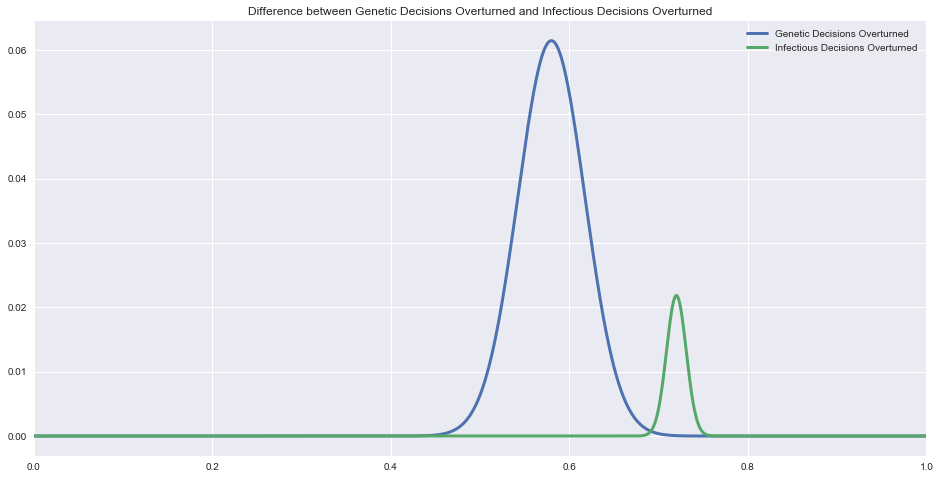

In [13]:
# Distribution of samples of Hypothesis One

binomial1 = stats.binom(n=173, p=0.58)
binomial1_mean = 0.58 * 173
binomial1_var = 173 * 0.58 * 0.42
normal_approx1 = stats.norm(binomial1_mean, np.sqrt(binomial1_var))
x1 = np.linspace(0, 500, num=20000)
bar1_sizes = [binomial1.pmf(i) for i in range(174)]

binomial2 = stats.binom(n=1655, p=0.72)
binomial2_mean = 0.72 * 1655
binomial2_var = 1655 * 0.72 * 0.28
normal_approx2 = stats.norm(binomial2_mean, np.sqrt(binomial2_var))
x2 = np.linspace(0, 2000, num=20000)
bar2_sizes = [binomial2.pmf(i) for i in range(1656)]

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(x1/173, normal_approx1.pdf(x1), linewidth=3)
ax.plot(x2/1655, normal_approx2.pdf(x2), linewidth=3)
ax.set_xlim(0, 1)
ax.set_title("Difference between Genetic Decisions Overturned and Infectious Decisions Overturned")
ax.legend(['Genetic Decisions Overturned', 'Infectious Decisions Overturned'])

fig.savefig('genetic_vs_infectious.png')

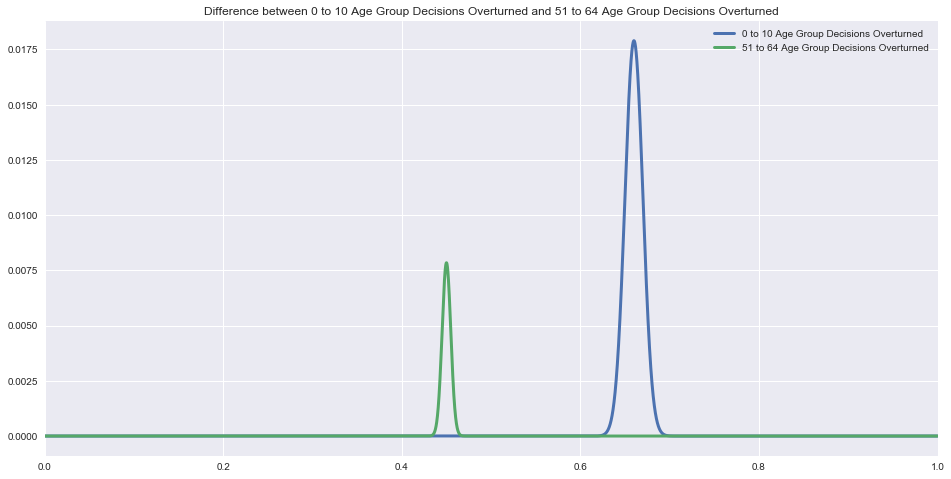

In [44]:
# Distributions of Samples of Hypothesis Two

binomial3 = stats.binom(n=2214, p=0.66)
binomial3_mean = 0.66 * 2214
binomial3_var = 2214 * 0.66 * 0.34
normal_approx3 = stats.norm(binomial3_mean, np.sqrt(binomial3_var))
x3 = np.linspace(0, 2500, num=20000)
bar3_sizes = [binomial3.pmf(i) for i in range(2215)]

binomial4 = stats.binom(n=10450, p=0.45)
binomial4_mean = 0.45 * 10450
binomial4_var = 10450 * 0.45 * 0.55
normal_approx4 = stats.norm(binomial4_mean, np.sqrt(binomial4_var))
x4 = np.linspace(0, 12000, num=20000)
bar4_sizes = [binomial4.pmf(i) for i in range(10451)]

fig, ax2 = plt.subplots(figsize=(16, 8))

ax2.plot(x3/2214, normal_approx3.pdf(x3), linewidth=3)
ax2.plot(x4/10450, normal_approx4.pdf(x4), linewidth=3)
ax2.set_xlim(0, 1)
ax2.set_title("Difference between 0 to 10 Age Group Decisions Overturned and 51 to 64 Age Group Decisions Overturned")
ax2.legend(['0 to 10 Age Group Decisions Overturned', '51 to 64 Age Group Decisions Overturned'])

fig.savefig('0_10_vs_51_64.png')

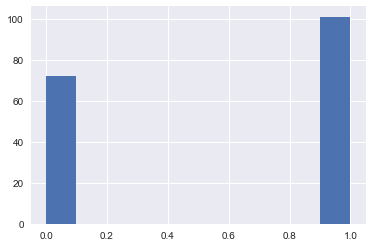

In [147]:
fig, axs = plt.subplots()
dfd_gen['Determination'].hist()
# ax.hist(dfd_gen.Determination, bins = 100)
# ax.hist(dfd_lw.Determination, bins = 100, color = 'red')

# Hypothesis four - Age[41/50 - 51/64]

In [45]:
'''

Question: Is the probability of '41 to 50' age group being overturned more than the probability of '51 to 64'?

p_lwr = probability of '41 to 50' age group being overturned
p_hir = probability of '51 to 64' age group being overturned

null Hypothesis(n0): p_lwr == p_hir
alternate Hypothesis(nA): p_lwr != p_hir

'''

"\n\nQuestion: Is the probability of '41 to 50' age group being overturned more than the probability of '51 to 64'?\n\np_lwr = probability of '41 to 50' age group being overturned\np_hir = probability of '51 to 64' age group being overturned\n\nnull Hypothesis(n0): p_lwr == p_hir\nalternate Hypothesis(nA): p_lwr != p_hir\n\n"

In [46]:
# Importing and sorting the required columns

dfa_r = df[['ReferenceID', 'AgeRange', 'Determination']]

dfa_r['41 to 50'] = dfa_r['AgeRange'].str.find('41 to 50')
dfa_lwr = dfa_r[(dfa_r['41 to 50']==0)]
dfa_lwr.drop(columns = ['41 to 50', 'AgeRange'], inplace = True)
dfa_lwr.rename(columns = {'ReferenceID':'41 to 50'}, inplace = True)
dfa_lwr['Out'] = dfa_r['Determination'].str.find('Overturned')
dfa_lwr['Out'] = dfa_lwr['Out'] + 1
dfa_lwr.drop(columns = ['Determination'], inplace = True)
dfa_lwr.rename(columns = {'Out':'Determination', '41 to 50': 'Count'}, inplace = True)
dfa_LWR = dfa_lwr.groupby(['Determination']).count()     ###     0 = Upheld          1 = Overturned


dfa_r['51 to 64'] = dfa_r['AgeRange'].str.find('51 to 64')
dfa_hir = dfa_r[(dfa_r['51 to 64']==0)]
dfa_hir.drop(columns = ['41 to 50', '51 to 64', 'AgeRange'], inplace = True)
dfa_hir.rename(columns = {'ReferenceID':'51 to 64'}, inplace = True)
dfa_hir['Out'] = dfa_r['Determination'].str.find('Overturned')
dfa_hir['Out'] = dfa_hir['Out'] + 1
dfa_hir.drop(columns = ['Determination'], inplace = True)
dfa_hir.rename(columns = {'Out':'Determination', '51 to 64': 'Count'}, inplace = True)
dfa_HIR = dfa_hir.groupby(['Determination']).count()     ###     0 = Upheld          1 = Overturned


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

(-1, 1)

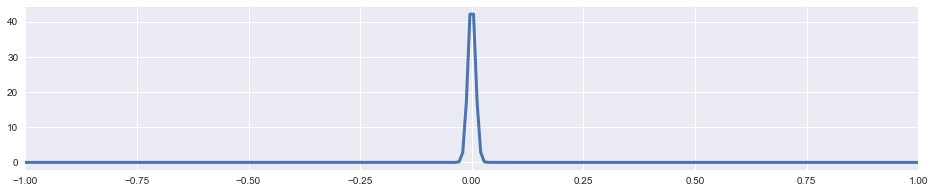

In [47]:
# Z-test hypothesis
shared_sample_freq_4 = (2126.0 + 4738.0) / 15570
shared_sample_variance_4 = 15570 * (shared_sample_freq_4 * (1 - shared_sample_freq_4)) / 53504000

difference_in_proportions_4 = stats.norm(0, np.sqrt(shared_sample_variance_4))

fig, ax41 = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=250)
ax41.plot(x, difference_in_proportions_4.pdf(x), linewidth=3)
ax41.set_xlim(-1, 1)

In [48]:
lwr_sample_freq = 2126.0 / 5120
hir_sample_freq = 4738.0 / 10450
difference_in_sample_proportions_4 = hir_sample_freq - lwr_sample_freq
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions_4))

Difference in sample proportions: 0.04


In [49]:
p_value_s41 = 1 - difference_in_proportions_4.cdf(difference_in_sample_proportions_4)
print("p-value for overturned frequency comparison: {:2.2f}".format(p_value_s41))

p-value for overturned frequency comparison: 0.00


Text(0.5, 1.0, 'p-value Region')

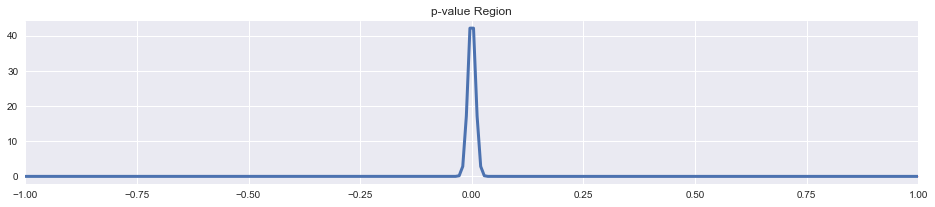

In [50]:
fig, ax42 = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=250)
ax42.plot(x, difference_in_proportions_4.pdf(x), linewidth=3)
ax42.fill_between(x, difference_in_proportions_4.pdf(x), where=(x >= difference_in_sample_proportions_4),
                color="red", alpha=0.5)
ax42.set_xlim(-1, 1)
ax42.set_title("p-value Region")


### REJECT THE NULL HYPOTHESIS   ###

In [51]:
# Welch T-test hypothesis

stats.ttest_ind(dfa_lwr['Determination'],dfa_hir['Determination'], equal_var=False)

Ttest_indResult(statistic=-4.524248197731364, pvalue=6.129157222924382e-06)

In [52]:
# U-test Hypothesis

res2 = stats.mannwhitneyu(dfa_lwr.Determination, dfa_hir.Determination, alternative="two-sided")
print(res)
print("p-value for Genetic Diseases overturned == Infectious Diseases overturned: {:2.3f}".format(res.pvalue))

MannwhitneyuResult(statistic=14030059.0, pvalue=2.811876409934623e-74)
p-value for Genetic Diseases overturned == Infectious Diseases overturned: 0.000


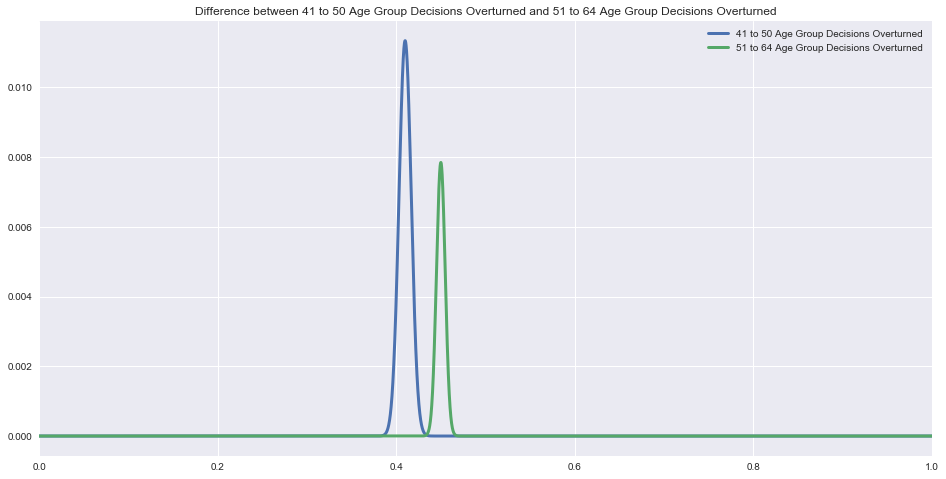

In [53]:
# Distributions of Samples of Hypothesis Four

binomial5 = stats.binom(n=5120, p=0.41)
binomial5_mean = 0.41 * 5120
binomial5_var = 5120 * 0.41 * 0.59
normal_approx5 = stats.norm(binomial5_mean, np.sqrt(binomial5_var))
x5 = np.linspace(0, 5500, num=20000)
bar5_sizes = [binomial5.pmf(i) for i in range(5121)]

binomial6 = stats.binom(n=10450, p=0.45)
binomial6_mean = 0.45 * 10450
binomial6_var = 10450 * 0.45 * 0.55
normal_approx6 = stats.norm(binomial6_mean, np.sqrt(binomial6_var))
x6 = np.linspace(0, 12000, num=20000)
bar6_sizes = [binomial6.pmf(i) for i in range(10451)]

fig, ax43 = plt.subplots(figsize=(16, 8))

ax43.plot(x5/5120, normal_approx5.pdf(x5), linewidth=3)
ax43.plot(x6/10450, normal_approx6.pdf(x6), linewidth=3)
ax43.set_xlim(0, 1)
ax43.set_title("Difference between 41 to 50 Age Group Decisions Overturned and 51 to 64 Age Group Decisions Overturned")
ax43.legend(['41 to 50 Age Group Decisions Overturned', '51 to 64 Age Group Decisions Overturned'])

fig.savefig('41_50_vs_51_64.png')